In [3]:
import mmengine
import mmcv
from mmcv.transforms import Compose, Resize
import matplotlib.pyplot as plt
from mmdet.utils import get_test_pipeline_cfg
import torch
import numpy as np
import torchvision.transforms as torch_trans
from mmdet.apis import init_detector, inference_detector 
from wrappers import *
from mmdet.visualization import DetLocalVisualizer

In [4]:
model_path = "/home/huemorgen/Defect-Detection/configs/swin_based/swin_tiny.py"
ckpt_path = "weights/epoch_12.pth"
model = init_detector(model_path, ckpt_path)
vis = DetLocalVisualizer()

Loads checkpoint by local backend from path: weights/epoch_12.pth


In [5]:
palette = [(220, 20, 60), (119, 11, 32), (0, 0, 142), (0, 0, 230), (0, 200, 30), (100, 200, 150), (100, 200, 50), (10, 200, 50)]
CLASSES = ('1','2','3','4','5','6')
img = mmcv.imread("cam/76.jpg")


TIME: 1.3990795612335205


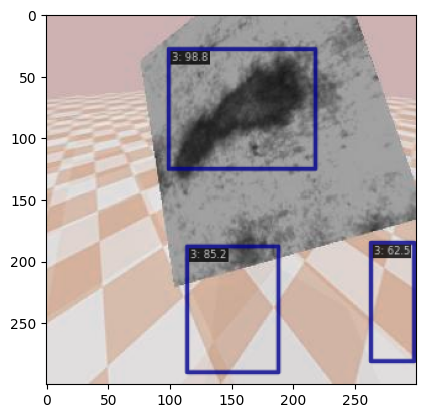

In [6]:
import time
start = time.time()
results = inference_detector(model, img)
end = time.time()
print("TIME:", end-start)
# results.pred_instances.labels = torch.ones_like(results.pred_instances.labels)
results.pred_instances = results.pred_instances.detach().cpu()
output = vis._draw_instances(img, results.pred_instances[results.pred_instances.scores>0.01], classes=CLASSES, palette=palette)
plt.imshow(output)

In [9]:
output.shape

(300, 300, 3)